# 1. Introduction/Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
d2=pd.read_csv('group2.csv')
d2=d2.iloc[:,1:]
d2.info()
d2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 16 columns):
T1Y Index      223 non-null float64
T2Y Index      223 non-null float64
T3Y Index      223 non-null float64
T5Y Index      223 non-null float64
T7Y Index      223 non-null float64
T10Y Index     223 non-null float64
CP1M           223 non-null float64
CP3M           223 non-null float64
CP6M           223 non-null float64
CP1M_T1Y       223 non-null float64
CP3M_T1Y       223 non-null float64
CP6M_T1Y       223 non-null float64
USPHCI         223 non-null float64
PCT 3MO FWD    223 non-null float64
PCT 6MO FWD    223 non-null float64
PCT 9MO FWD    223 non-null float64
dtypes: float64(16)
memory usage: 28.0 KB


,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,79.210000,0.020297,0.036636,0.050174


C:\Users\Wincy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


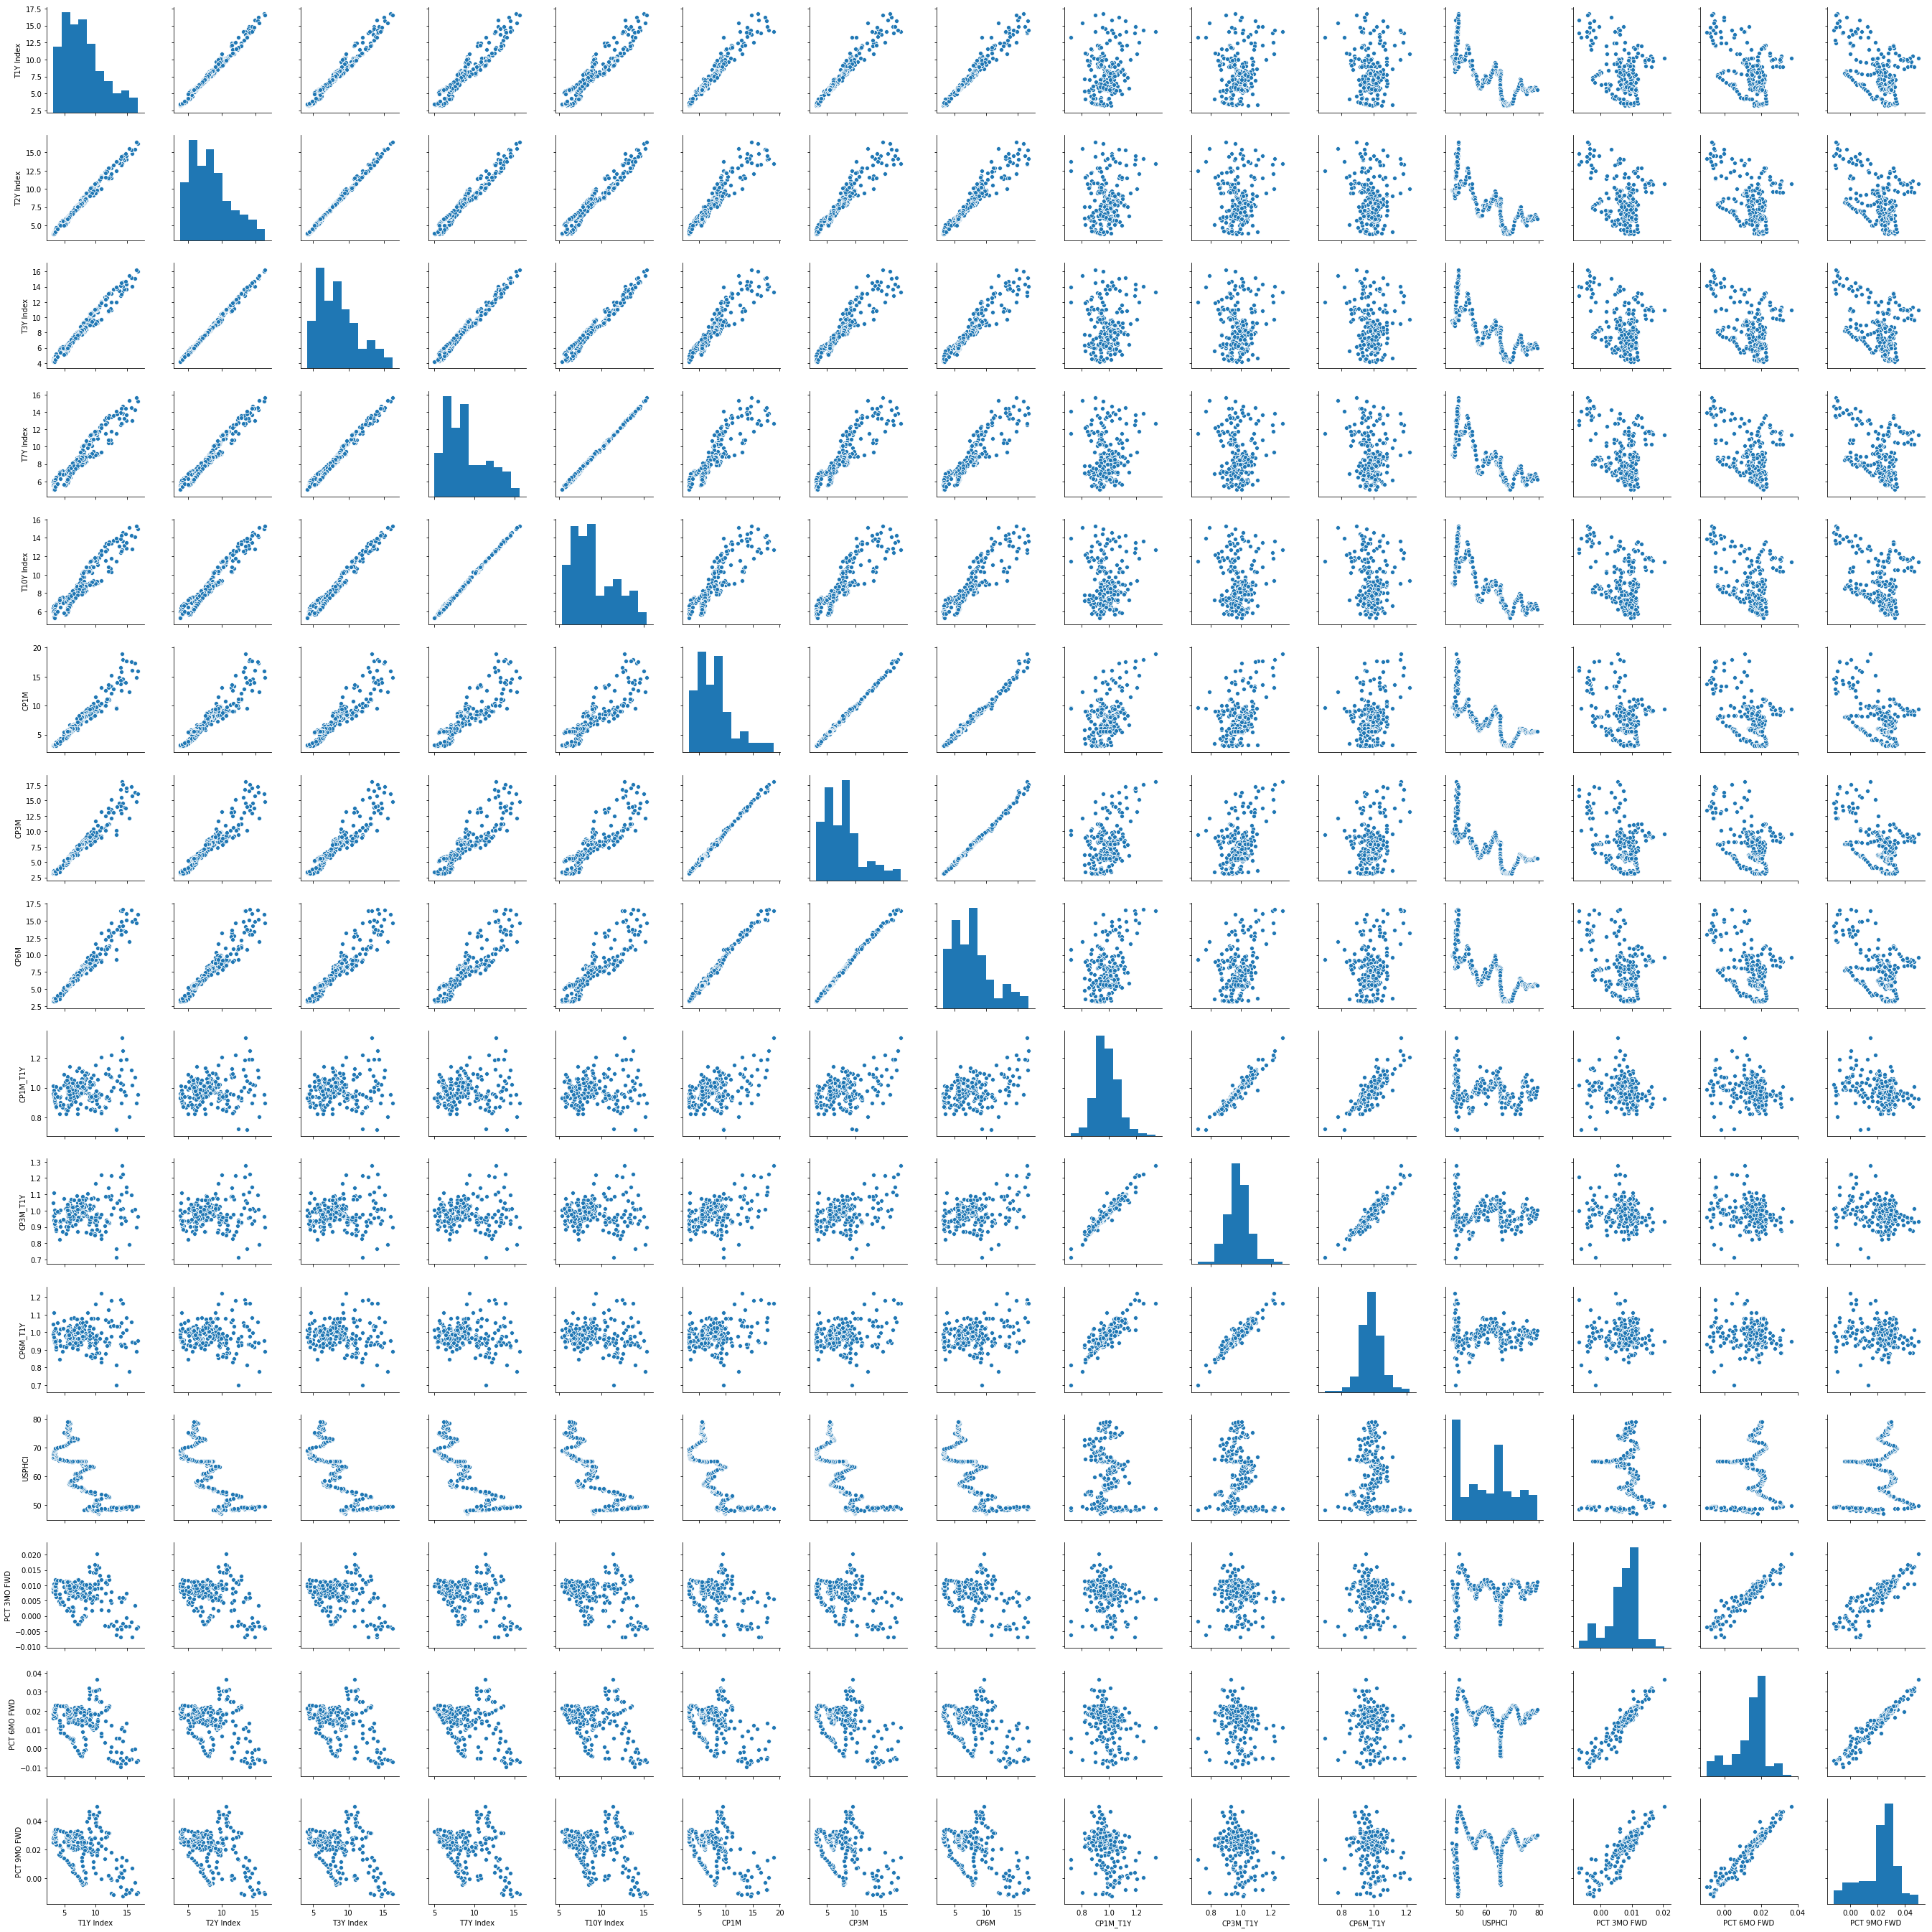

In [3]:
#EDA
import seaborn as sns
cols = ['T1Y Index','T2Y Index','T3Y Index','T7Y Index','T10Y Index','CP1M','CP3M','CP6M','CP1M_T1Y','CP3M_T1Y','CP6M_T1Y','USPHCI','PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD']
sns.pairplot(d2[cols], size=2.5)
plt.tight_layout()
plt.show()

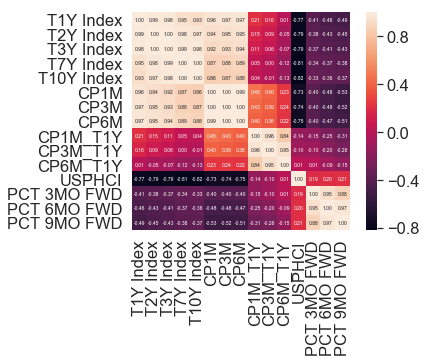

In [4]:
#HeatMap
cm = np.corrcoef(d2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,
fmt='.2f',annot_kws={'size': 5},yticklabels=cols,xticklabels=cols)
plt.show()

# 2. Preprocessing, feature extraction, feature selection

In [24]:
X=d2.iloc[:,:9]
y3=d2.iloc[:,13]
y6=d2.iloc[:,14]
y9=d2.iloc[:,15]

X1=X.iloc[:,:6]
X2=X.iloc[:,6:]
X.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71


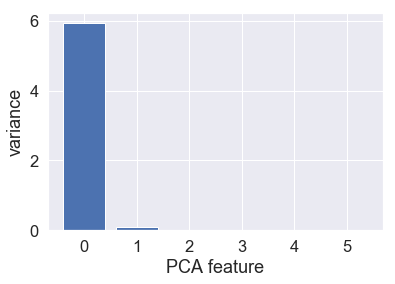

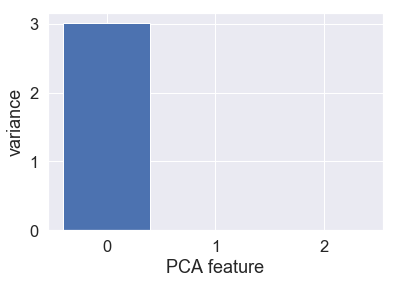

In [25]:
#feature selection: PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to samples in X1
pipeline.fit(X1)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# Fit the pipeline to samples in X2
pipeline.fit(X2)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [26]:
#select final variables we need in modeling
X_selected=X.filter(['T1Y Index','CP1M'],axis=1)
X_selected.head()

,T1Y Index,CP1M
0,10.41,9.75
1,10.24,9.74
2,10.25,9.72
3,10.12,9.86
4,10.12,9.77


In [78]:
#train test split and normalization
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y9, test_size=0.15, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (189, 2)
Shape of y_train:  (189,)
Shape of X_test:  (34, 2)
Shape of y_test:  (34,)


# 3.Model fitting and evaluation

In [79]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
slr = LinearRegression()
slr.fit(X_train,y_train)
print('R2 training: ', slr.score(X_train, y_train))
print('RMSE training: ', np.sqrt(mean_squared_error(slr.predict(X_train), y_train)))
print('R2 testing : ', slr.score(X_test, y_test))
print('RMSE testing : ', np.sqrt(mean_squared_error(slr.predict(X_test), y_test)))

R2 training:  0.2852432225874185
RMSE training:  0.011126006444731742
R2 testing :  0.2368535176176928
RMSE testing :  0.010579609236528677


In [80]:
#Ridge Regression Model
from sklearn.linear_model import Lasso
ridge = Ridge()
ridge.fit(X_train, y_train)
print('R2 training: ', ridge.score(X_train, y_train))
print('RMSE training: ', np.sqrt(mean_squared_error(ridge.predict(X_train), y_train)))
print('R2 testing : ', ridge.score(X_test, y_test))
print('RMSE testing : ', np.sqrt(mean_squared_error(ridge.predict(X_test), y_test)))

R2 training:  0.2850783286740377
RMSE training:  0.011127289751866616
R2 testing :  0.22946557990421823
RMSE testing :  0.010630695913730814


In [81]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print('R2 training: ', tree.score(X_train, y_train))
print('RMSE training: ', np.sqrt(mean_squared_error(tree.predict(X_train), y_train)))
print('R2 testing : ', tree.score(X_test, y_test))
print('RMSE testing : ', np.sqrt(mean_squared_error(tree.predict(X_test), y_test)))

R2 training:  0.999947862383949
RMSE training:  9.50245345236367e-05
R2 testing :  0.10259806635163371
RMSE testing :  0.011472529265485382


In [82]:
#Support Vector Regression Model
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
print('R2 training: ', svr.score(X_train, y_train))
print('RMSE training: ', np.sqrt(mean_squared_error(svr.predict(X_train), y_train)))
print('R2 testing : ', svr.score(X_test, y_test))
print('RMSE testing : ', np.sqrt(mean_squared_error(svr.predict(X_test), y_test)))

R2 training:  -0.023559772562427694
RMSE training:  0.013314251940751587
R2 testing :  -0.05042726523111862
RMSE testing :  0.012412197194934142


# 4.Hyperparameter tuning

In [102]:
#here we choose Ridge Regression model which has good performance in model fitting to do hyperparameter tuning
#Ridge Regression Model tuning using GridSearch
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
a_space = np.arange(0,100,0.01)
param_grid = {'alpha':a_space}
ridge_gs = GridSearchCV(ridge, param_grid,cv=10)
ridge_gs.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Ridge Regression Parameter: {}".format(ridge_gs.best_params_))
print("Tuned Ridge Regression Accuracy: {}".format(ridge_gs.best_score_))

Tuned Ridge Regression Parameter: {'alpha': 35.07}
Tuned Ridge Regression Accuracy: 0.12002837625216006


C:\Users\Wincy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 5.Ensembling

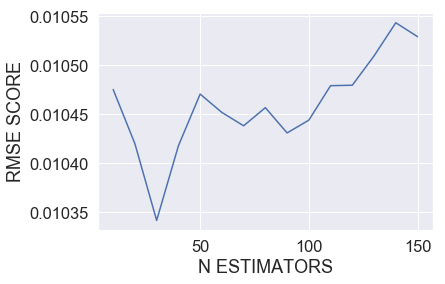

In [98]:
#Random Forest Regressor(Bagging)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
rmse_test = []
test_acc = []
counter_n=[]
for n in range(10,160,10):
    rf = RandomForestRegressor(n_estimators=n,random_state=2)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    test_acc.append(np.mean(cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1)))
    rmse_test.append((mean_squared_error(y_test, y_pred))**0.5)
    counter_n.append(n)
    
plt.plot(counter_n, rmse_test)
plt.xlabel('N ESTIMATORS')
plt.ylabel('RMSE SCORE')
plt.show()

In [101]:
rf_optimal = RandomForestRegressor(n_estimators=140,random_state=2)   
rf_optimal.fit(X_train, y_train) 
y_pred_optimal = rf_optimal.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred_optimal)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.01
